# Integral de Convolução

Renato Naville Watanabe

## Preparação do ambiente

In [ ]:
try:
  from google.colab import output
  output.enable_custom_widget_manager()
  IN_COLAB = True
except:
  IN_COLAB = False

if IN_COLAB:
  !pip install ipympl
  from IPython.display import clear_output
  !sudo apt update
  !sudo apt install libcairo2-dev ffmpeg \
       texlive texlive-latex-extra texlive-fonts-extra \
       texlive-latex-recommended texlive-science \
       tipa libpango1.0-dev
  !pip install manim
  !pip install IPython --upgrade
  clear_output()
  # Se estiver no Colab, reiniciar o ambiente após executar esta célula

In [ ]:
import sympy as sym
import numpy as np
from sympy.plotting import PlotGrid
from manim import *
config.media_width = "100%"
config.verbosity = "WARNING"

## Definição do problema

Aqui, vamos encontrar uma expressão para $y(t)$ que só dependa de $n$, dada uma equação de diferenças linear e invariante no tempo:

$$\frac{d^Ny}{dt^N} + a_{N-1}\frac{d^{N-1}y}{dt^{N-1}}+...+a_0y(t) = b_M\frac{d^Mx}{dt^M} +...+b_2\frac{d^2x}{dt^2}+b_1\frac{dx}{dt} + b_0x(t) $$

## Composição da solução

A solução desta equação é formada por duas partes:

$$y(t) = y_{zi}(t) + y_{zs}(t)$$

em que $y_{zi}(t)$ é a parte de $y$ devida às condições iniciais do sinal de saída (os valores de $y(0), \frac{dy}{dt}(0), ..., \frac{d^{N-1}y}{dt^{N-1}}(0)$). Para o cálculo dessa componente, considera-se que a entrada $x(t)$ e todas as suas derivadas são nulas ($zi$ é de *zero input*, **entrada nula** em inglês).

A outra componente, $y_{zs}(t)$, é devido à entrada $x(t)$. Para o cálculo dessa componente consideramos que os valores de $y(0), \frac{dy}{dt}(0), ..., \frac{d^{N-1}y}{dt^{N-1}}(0)$ são todos iguais a 0 ($zs$ é de *zero state*, **estado nulo** em inglês, às vezes também chamado de **repouso**).

Aqui, vamos entender como obter a reposta de estado nulo para sistemas contínuos lineares e invariantes no tempo. A resposta devido às condições ininciais já foi abordada.

## Integral de convolução

Aqui, vamos desenvolver um método para encontrar a saída $y(t)$ de um sistema contínuo linear e invariante no tempo para uma entrada $x(t)$ qualquer.

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/contsis.png?raw=1 width="400">

Vamos considerar que conhecemos a  resposta ao impulso do sistema.

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/diagimpulsocont.png?raw=1 width="300">

Como o sistema é linear e invariante no tempo se usarmos como entrada o impulso de Dirac multiplicado por um valor real e atrasado em alguma quantidade de tempo ($\alpha\delta(t-T)$), a saída será $\alpha h(t-T)$ (multiplicada pelo mesmo valor e atrsada da mesma quantidade de tempo).

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/diagimpulsodelaycont.png?raw=1 width="400">

Em sinais de tempo contínuo, pelo terorema da amostragem, podemos escrever o valor de $x(t)$ em algum instante específico como:

$$x(\tau) = x(\tau)\delta(t-\tau)$$

Então ao usar $x(\tau)$ como entrada, a saída é $x(\tau)h(t-\tau)$

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/diagimpulsoamostracont.png?raw=1 width="400">

O sinal $x(t)$ todo pode ser escrito como a soma (integral, já que é um sinal contínuo) dos valores em cada instante. Então podemos reescrever o sinal $x(t)$ como:

$$x(t) = \int_{-\infty}^\infty x(\tau)\delta(t-\tau)\,d\tau$$

Ou seja, o sinal $x(t)$ é a integral de impulsos deslocados no tempo.

Então, considerando o exposto acima e o princípio da superposição que sistemas lineares e invariantes no tempo obedecem, temos que a saída do sistema será:


$$y(t) = \int_{-\infty}^\infty x(\tau)h(t-\tau)\,d\tau $$

Esta relação está representada na imagem abaixo:

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/diagconvcont.png?raw=1 width="500">


Esta expressão é central no desenvolvimento da teoria de sistemas e sinais de tempo contínuo e recebe o nome de **integral de convolução**.

A integral de convolução é uma operação entre dois sinais (no caso acima $x(t)$ e $h(t)$) e é representada pelo operador *.

$$y(t) = \int_{-\infty}^\infty x(\tau)h(t-\tau)\,d\tau = x(t)*h(t)$$

Perceba que o símbolo * é apenas uma forma reduzida de representar a integral de convolução (nunca se deve confundir com a simples multiplicação dos valores de $x$ e $h$ no instante $t$).

## Forma de calcular a integral de convolução



### Método gráfico

Esse método é muito utilizado para saber a forma do resultado da convolução. É bom para entender o que representa a integral de convolução. Vamos voltar para a expressão da convolução:

$$y(t) = x(t)*h(t) = \int_{-\infty}^\infty x(\tau)h(t-\tau)\,d\tau$$

Podemos enxergar os sinais como sendo função de $\tau$ ao invés de $t$. Então, para $t = 0$, temos os dois sinais a ser considerado: $x(t)$ e $h(-t)$ (a resposta ao impulso espelhada).

---

#### Exemplo 1

Vamos fazer a convolução entre

$$x(t) = 2u(t) - 2u(t-1)$$

e

$$h(t) = tu(t) - tu(t-2)$$

In [ ]:
import sympy as sym
import numpy as np
from manim import *
from sympy.plotting import PlotGrid
config.media_width = "100%"
config.verbosity = "WARNING"

Manim Community v0.17.3

In [ ]:
%%manim -qm IntegralConvolution

def signal_1(t):
    if 1 >= t >= 0:
        return 2
    else:
        return 0

def signal_2(t):
    if 2 >= t>= 0:
        return t
    else:
        return 0

class IntegralConvolution(Scene):
    def construct(self):

        axes1 = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 2, 1],
            x_length=10,
            y_length=1,
            axis_config={
                "color": WHITE,
                "stroke_width": 2,
                "include_tip": False,
            },
            x_axis_config={
                "numbers_to_include": np.arange(-5, 6)
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, 2, 1),
            },
        ).move_to(3.1*UP)
        self.play(Create(axes1))


        line_1 = axes1.plot(lambda x: signal_1(x), color=BLUE,
                            x_range=[-5,5, 0.01], use_smoothing=False)
        tex1 = MathTex('x(\\tau)').move_to((-3.7,3.7,0))
        self.play(Create(line_1), Create(tex1))

        axes2 = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 2, 1],
            x_length=10,
            y_length=1,
            axis_config={
                "color": WHITE,
                "stroke_width": 2,
                "include_tip": False,
            },
            x_axis_config={
                "numbers_to_include": np.arange(-5, 6)
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, 2, 1),
            },
        ).move_to(1.4*UP)
        self.play(Create(axes2))
        line_2 = axes2.plot(lambda x: signal_2(x), color=RED,
                            x_range=[-5, 5, 0.01], use_smoothing=False)
        tex2 = MathTex('h(\\tau)').move_to((-3.7,1.7,0))
        self.play(Create(line_2), Create(tex2))
        line_3 = axes2.plot(lambda x: signal_2(-x), color=RED,
                            x_range=[-5, 5, 0.01], use_smoothing=False)
        tex3 = MathTex('h(\\tau)').move_to((-3.7,1.7,0))
        self.play(ReplacementTransform(line_2,line_3),
                  ReplacementTransform(tex2, tex3))
        axes3 = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 2, 2],
            x_length=10,
            y_length=1,
            axis_config={
                "color": WHITE,
                "stroke_width": 2,
                "include_tip": False,
            },
            x_axis_config={
                "numbers_to_include": np.arange(-5, 6)
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, 2, 1),
            },
        ).move_to(0.5*DOWN)
        self.play(Create(axes3))

        axes4 = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 2, 1],
            x_length=10,
            y_length=1,
            axis_config={
                "color": WHITE,
                "stroke_width": 2,
                "include_tip": False,
            },
            x_axis_config={
                "numbers_to_include": np.arange(-5, 6)
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, 2, 1),
            },
        ).move_to(2.4*DOWN)
        self.play(Create(axes4))

        dx = 0.01
        x = np.arange(-5,5, dx)
        sig1 = np.zeros_like(x)
        sig2 = np.zeros_like(x)
        line_4 = axes3.plot_line_graph(x, sig1*sig2,
                                       add_vertex_dots=False,
                                       line_color=GREEN)

        tex4 = MathTex('x(\\tau)h(t-\\tau)').move_to((-3.7,-0.3,0))
        tex5 = MathTex('\int_{-\infty}^\infty x(\\tau)h(t-\\tau)\,d\\tau').move_to((-3.7,-2.3,0))
        tex6 = MathTex('h(t-\\tau)').move_to((-3.7,1.7,0))


        # area = Polygon([-5,0,0], color=GREEN)
        self.play(Create(line_4), Create(tex4),
                  Create(tex5), ReplacementTransform(tex3, tex6),
                  )
        sigconv = []



        for t in np.arange(-5, 5, 0.1):



            for i in range(len(x)):
                sig1[i] = signal_1(x[i])
                sig2[i] = signal_2(t-x[i])
            conv = np.sum(dx*(sig1*sig2))
            sigconv.append(conv)
            line_5 = axes3.plot_line_graph(x, sig1*sig2,
                                           add_vertex_dots=False,
                                           line_color=GREEN)
            listpoints_area = [[-5,0,0]]
            for j in range(len(sig1)):
                listpoints_area.append([j*dx-5, sig1[j]*sig2[j], 0])
            listpoints_area.append([5, 0,0])

            #area1 = Polygon(*listpoints_area, color=GREEN)

            line_6 = axes4.plot_line_graph(x[:10*len(sigconv):10],
                                           np.array(sigconv),
                                           add_vertex_dots=False,
                                           line_color=GOLD)
            self.play(line_3.animate.move_to(axes2.c2p(*(t, 1,0))),
                      Transform(line_4, line_5),
                      Create(line_6),
                      run_time=0.3)



        self.wait(5)


---

#### Resumo dos passos

1 - substituir $t$ por $\tau$ e fazer o gráfico de $x(\tau)$ e $h(-\tau)$.


2 - Deslocar $h[-\tau]$ para a direita em algumas unidades de tempo para gerar $h(t-\tau)$ até um ponto em que $h(t-\tau)$ não se sobreponha a $x(\tau)$. Multiplique os dois sinais e calcule a integral (área) do sinal resultante para encontrar o valor de $y(t)$.

3 - Continue deslocando $h(-\tau)$ para a direita, multiplicando o sinal $x(t)$ com a resposta ao impulso deslocada e calculando a sua integral  para encontrar os valores de $y(t)$. Continue fazendo isso até não ter mais sobreposição entre os sinais.

### Pelo cálculo da integral

Muitas vezes, é mais fácil calcular a integral de convolução diretamente, sem recorrer ao método gráfico.

---

#### Exemplo 2

$$x(t) = e^{-bt}u(t)$$

e

$$h(t) = e^{-at}u(t)$$

A integral de convolução entre esses dois sinais é:

$$x(t)*h(t) = \int_{-\infty}^\infty e^{-b\tau}u(\tau)e^{-a(t-\tau)}u(t-\tau)\,d\tau=\int_{0}^t e^{-b\tau}e^{-a(t-\tau)}\,d\tau = e^{at}\int_{0}^t e^{-b\tau}e^{a\tau)}\,d\tau $$

$$x(t)*h(t) = e^{at}\int_{0}^t e^{(a-b)\tau}\,d\tau = \left. e^{at}\left( \frac{e^{(a-b)\tau}}{a-b}\right)\right|_{\tau=0}^t\frac{e^{-bt}-e^{-at}}{a-b}$$

Para $a=2$ e $b=5$, o gráfico dessa convolução é:

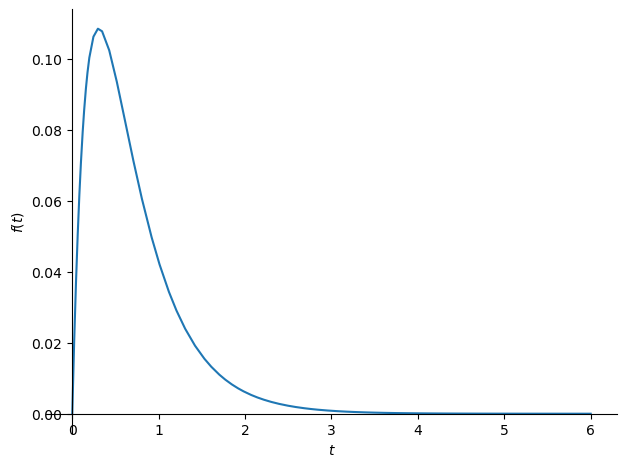

In [ ]:
t = sym.symbols('t')
a = 2
b = 5
y = (sym.exp(-b*t) - sym.exp(-a*t))/(a-b)
sym.plot(y, (t, 0, 6))

É claro que poderíamos ter feito essa convolução com o método gráfico também.

In [ ]:
%%manim -qm IntegralConvolution1

def signal_1(t):
    if t >= 0:
        return np.exp(-2*t)
    else:
        return 0

def signal_2(t):
    if t>= 0:
        return np.exp(-5*t)
    else:
        return 0

class IntegralConvolution1(Scene):
    def construct(self):

        axes1 = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 2, 1],
            x_length=10,
            y_length=1,
            axis_config={
                "color": WHITE,
                "stroke_width": 2,
                "include_tip": False,
            },
            x_axis_config={
                "numbers_to_include": np.arange(-5, 6)
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, 2, 1),
            },
        ).move_to(3.1*UP)
        self.play(Create(axes1))


        line_1 = axes1.plot(lambda x: signal_1(x), color=BLUE,
                            x_range=[-5,5, 0.01], use_smoothing=False)
        tex1 = MathTex('x(\\tau)').move_to((-3.7,3.7,0))
        self.play(Create(line_1), Create(tex1))

        axes2 = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 2, 1],
            x_length=10,
            y_length=1,
            axis_config={
                "color": WHITE,
                "stroke_width": 2,
                "include_tip": False,
            },
            x_axis_config={
                "numbers_to_include": np.arange(-5, 6)
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, 2, 1),
            },
        ).move_to(1.4*UP)
        self.play(Create(axes2))
        line_2 = axes2.plot(lambda x: signal_2(x), color=RED,
                            x_range=[-5, 5, 0.01], use_smoothing=False)
        tex2 = MathTex('h(\\tau)').move_to((-3.7,1.7,0))
        self.play(Create(line_2), Create(tex2))
        line_3 = axes2.plot(lambda x: signal_2(-x), color=RED,
                            x_range=[-5, 5, 0.01], use_smoothing=False)
        tex3 = MathTex('h(\\tau)').move_to((-3.7,1.7,0))
        self.play(ReplacementTransform(line_2,line_3),
                  ReplacementTransform(tex2, tex3))
        axes3 = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 2, 2],
            x_length=10,
            y_length=1,
            axis_config={
                "color": WHITE,
                "stroke_width": 2,
                "include_tip": False,
            },
            x_axis_config={
                "numbers_to_include": np.arange(-5, 6)
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, 2, 1),
            },
        ).move_to(0.5*DOWN)
        self.play(Create(axes3))

        axes4 = Axes(
            x_range=[-5, 5, 1],
            y_range=[0, 0.2, 1],
            x_length=10,
            y_length=1,
            axis_config={
                "color": WHITE,
                "stroke_width": 2,
                "include_tip": False,
            },
            x_axis_config={
                "numbers_to_include": np.arange(-5, 6)
            },
            y_axis_config={
                "numbers_to_include": np.arange(0, .3, 0.1),
            },
        ).move_to(2.4*DOWN)
        self.play(Create(axes4))

        dx = 0.01
        x = np.arange(-5,5, dx)
        sig1 = np.zeros_like(x)
        sig2 = np.zeros_like(x)
        line_4 = axes3.plot_line_graph(x, sig1*sig2,
                                       add_vertex_dots=False,
                                       line_color=GREEN)

        tex4 = MathTex('x(\\tau)h(t-\\tau)').move_to((-3.7,-0.3,0))
        tex5 = MathTex('\int_{-\infty}^\infty x(\\tau)h(t-\\tau)\,d\\tau').move_to((-3.7,-2.3,0))
        tex6 = MathTex('h(t-\\tau)').move_to((-3.7,1.7,0))


        # area = Polygon([-5,0,0], color=GREEN)
        self.play(Create(line_4), Create(tex4),
                  Create(tex5), ReplacementTransform(tex3, tex6),
                  )
        sigconv = []



        for t in np.arange(-5, 5, 0.1):

            for i in range(len(x)):
                sig1[i] = signal_1(x[i])
                sig2[i] = signal_2(t-x[i])
            conv = np.sum(dx*(sig1*sig2))
            sigconv.append(conv)
            line_5 = axes3.plot_line_graph(x, sig1*sig2,
                                           add_vertex_dots=False,
                                           line_color=GREEN)


            #area1 = Polygon(*listpoints_area, color=GREEN)

            line_6 = axes4.plot_line_graph(x[:10*len(sigconv):10],
                                           np.array(sigconv),
                                           add_vertex_dots=False,
                                           line_color=GOLD)
            self.play(line_3.animate.move_to(axes2.c2p(*(t, 0.5,0))),
                      Transform(line_4, line_5),
                      Create(line_6),
                      run_time=0.3)



        self.wait(5)

---

#### Exemplo 3

Vamos considerar um sistema com a seguinte resposta ao impulso:

$h(t) = e^{-3t}u(t)$

Se esse sistema tiver como entrada:

$x(t) = u(t)$

Então, a saída devido a essa entrada é:

$y(t) = \int_{-\infty}^\infty u(\tau)e^{-3(t-\tau)}u(t-\tau)\,d\tau = \int_{0}^t e^{-3(t-\tau)}\,d\tau = e^{-3t}\int_{0}^t e^{3\tau}\,d\tau = \frac{e^{-3t}}{3}\left.e^{3\tau}\right|_{\tau=0}^t u(t) = \frac{e^{-3t}}{3}(e^{3t}-1) = \frac{1-e^{-3t}}{3}u(t)$



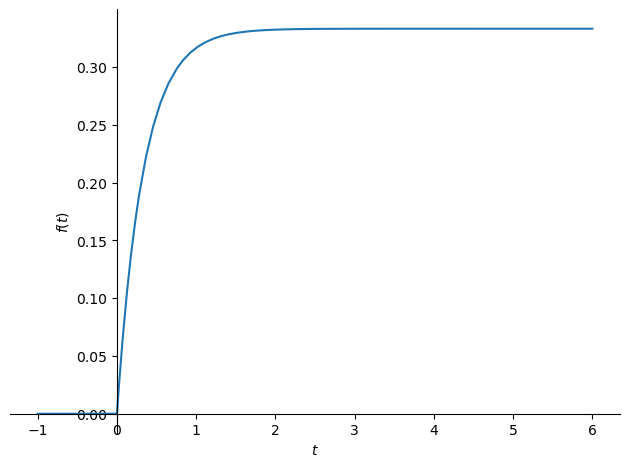

In [ ]:
t = sym.symbols('t')
y = (1-sym.exp(-3*t))/3*sym.Heaviside(t)
sym.plot(y, (t, -1, 6));

----

## Caracterização de um SLIT pela resposta ao impulso

A principal consequência da integral de convolução é que conseguimos caracterizar completamente um sistema linear e invariante no tempo de contínuo pela sua resposta ao impulso. Perceba que não é necessário conhecer a equação de diferenças nem o diagrama de blocos do sistema se tivermos a resposta ao impulso. Portanto, **a resposta ao impulso caracteriza completamente o comportamento de um sistema linear e invariante no tempo**.

Por isso, é bastante comum no diagrama de blocos representar o sistema pela sua respsota ao impulso.


<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/impulsoconvcont.png?raw=1 width="500">

## Propriedades da convolução

### Comutativa

Uma das propriedades mais importantes, principalmente do ponto de vista prático, já que pode facilitar a computação da conolução.

> $x(t)*h(t) = h(t)*x(t)$

**Prova**:

Aqui é feita uma mudança de variável ($\upsilon = t-\tau$), e a prova sai facilmente.

$$ x(t)*h(t) =  \int_{-\infty}^\infty x(\tau)h(t-\tau)\,d\tau = \int_{-\infty}^\infty x(t-\upsilon)h(\upsilon)\,d\upsilon = h(t)*x(t)$$


### Distributiva

> $x(t)*h_1(t)+x(t)*h_2(t) = x(t)*(h_1(t)+ h_2(t))$

A prova dessa propriedade fica para o Exercício 1.  

Com esta propriedade, podemos interpretar dois sistemas ligados em paralelo, recebendo a mesma entrada, como sendo apenas um sistema que tem a resposta ao impulso igual a soma das respostas ao impulso dos dois sistemas ligados em paraleo.

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/distributivaconvcont.png?raw=1 width="600">


Uma outra consequência dessa propriedade é que podemos dividir a resposta ao impulso de um sistema em várias partes se isso facilitar o cálculo da somatória de convolução.

### Associativa

> $x(t)*(h_1(t)*h_2(t)) = (x(t)*h_1(t))*h_2(t)$

A prova dessa propriedade fica para o Exercício 2.

A principal consequência dessa propriedade é que se tivermos dois sistemas em série, podemos considerá-los como um sistema com a resposta ao impulso sendo a convolução das respostas ao impulso dos dois sistemas.

<img src=https://github.com/rnwatanabe/SistemasESinais/blob/master/Imagens/associativaconvcont.png?raw=1 width="500">


## Exercícios

**1)** Prove a propriedade distributiva da integral de convolução.

**2)** Prove a propriedade associativa da integral de convolução

**3)** Seja o sinal $h(t)$:

$$h(t) = e^{3t}u(-t+1) + e^{-3t}u(t-3)$$

Determine os valores de $A$ e $B$ de forma que:

$$h(t-\tau) = \left\{\begin{array}{cc}e^{-3(t-\tau)}&,\tau<A\\0&,A\leq\tau<B \\e^{3(t-\tau)}&,\tau\geq B \end{array} \right.$$

**4)** Determine:

a) $u(t)*u(t)$

b) $e^{-3t}u(t)*u(t)$

c) $tu(t)*u(t)$

d) $\mathrm{sen}(t)u(t)*u(t)$

e) $\cos(t)u(t)*u(t)$

**5)** Determine a resposta de um sistema linear e invariante no tempo (estado nulo) às  entradas abaixo, considerando que esse sistema tem a seguinte resposta ao impulso:

$h(t) = e^{-3t}u(t)$

a) $x_1(t) = u(t)$

b) $x_2(t) = e^{-2t}u(t)$

c) $x_3(t) = \cos(2t)u(t)$

**6)** Calcule a resposta do sistema que tem a resposta ao impulso $h(t)$ mostrada no gráfico abaixo quando é usada a entrada $x(t)$, também mostrada abaixo. Esse sistema é causal?

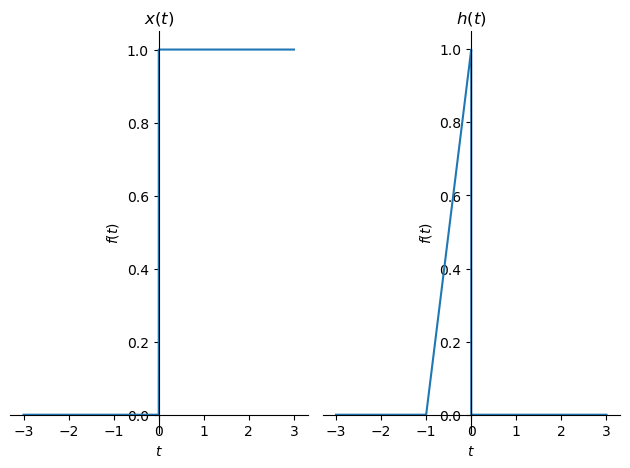

In [ ]:
t = sym.symbols('t')

x = sym.Piecewise((1, (t >= 0)),
                  (0, True))
p1 = sym.plot(x, (t, -3, 3), show=False, title='$x(t)$')
h = sym.Piecewise((t+1, (t >= -1) & (t < 0)),
                  (0, True))
p2 = sym.plot(h, (t, -3,3), show=False, title='$h(t)$')
PlotGrid(1, 2, p1, p2)

**7)** Considere o circuito elétrico da figura abaixo:

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/RC_Series_Filter_%28with_V%26I_Labels%29.svg/1920px-RC_Series_Filter_%28with_V%26I_Labels%29.svg.png width="400">

Considere que o sinal de entrada do sistema é a tensão do gerador $x(t) = V_{in}$ e o sinal de saída é a tensão no capacitor $y(t)=V_c$. Pede-se:

a) A equação diferencial que descreve o comportamento desse sistema (lembre-se que $I=C\frac{dV_c}{dt}$ e $I = \frac{V_r}{R}$ e $V_{in}=V_R+V_C$).

b) A resposta ao impulso desse sistema.

c) Determine a resposta de entrada nula, e esboce seu gráfico, considerando que $V_c(0) = 1$ V.

d) Encontre o sinal de saída, levando em conta a sua condição inicial, para o sinal de entrada $x(t) = u(t)$ V.

**8)** Qual o comportamento esperado (descreva em palavras, justificando) de um sistema que tenha como resposta ao impulso as seguintes funções:

a) $h_1(t) = u(t)$

b) $h_2(t) = \delta(t)$

**9)** Considerando que um sistema linear e invariante no tempo com resposta ao impulso $h(t)$ tem uma saída $y(t)$ quando é usada como entrada o sinal $x(t)$. Qual é a saída do sistema quando a entrada é $x_1(t) = \frac{dx}{dt}$?

**10)** Encontre a solução de estado nulo para os sistemas descritos pelas seguintes equações diferenciais e entradas.

a) $\frac{dy}{dt} = -6y(t) + x(t)$, com $x(t)=u(t)$

b) $\frac{dy}{dt} = 4y(t)  + x(t)$, com $x(t) = e^{-3t}u(t)$

c) $\frac{d^2y}{dt^2} = -\frac{dy}{dt} + \frac{dx}{dt} + x(t)$, com $x(t) = 25u(t)$

d) $\frac{d^2y}{dt^2} = -4y(t) + x(t)$, com $x(t) = \cos(2t)u(t)$

e) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-13y(t) + 4\frac{dx}{dt} + 2x(t)$, com $x(t) = e^{-t}u(t)$

## Referências

- Ulaby, FT e Yagle, AE, Signals & Systems: Theory and Applications, 2018, [ss2.eecs.umich.edu](ss2.eecs.umich.edu)
- Oppenheim, M.  e Willsky, S., Sistemas e Sinais, 2010

- Lathi, BP, Sinais e Sistemas Lineares, 2007

## Solução dos exercícios

**1)** Resolvido por Juliana Soares da Silva de Oliveira

Prove a propriedade distributiva da integral de convolução.

Partindo de:

$x(t)*h_1(t)+x(t)*h_2(t) = x(t)*(h_1(t)+ h_2(t))$

Aplicando a definição na parte esquerda da equação:

$\int_{-\infty}^\infty x(\tau)h_1(t-\tau)\,d\tau + \int_{-\infty}^\infty x(\tau)h_2(t-\tau)\,d\tau$

$\int_{-\infty}^\infty (x(\tau)h_1(t-\tau) + x(\tau)h_2(t-\tau))\,d\tau$

$\int_{-\infty}^\infty x(\tau)(h_1(t-\tau) + h_2(t-\tau))\,d\tau$

vamos definir uma função $h_{3}(t-\tau) = h_1(t-\tau) + h_2(t-\tau)$, sendo assim:

$\int_{-\infty}^\infty x(\tau)h_{3}(t-\tau)\,d\tau = x(t)*h_3(t) = x(t)*(h_1(t)+h_2(t))$

**2)** Resolvido por Catherine

A propriedade associativa da integral de convolução afirma que, para quaisquer três funções $f(t)$, $g(t)$ e $h(t)$, temos:

$(f * g) * h = f * (g * h)$

Para provar esta propriedade, precisamos mostrar que:

$int_a^b f(t) * g(t - \tau) * h(\tau) d\tau = \int_a^b f(t) * (g(t - \tau) * h(\tau)) d\tau$

Aqui, $f(t)$, $g(t)$ e $h(t)$ são funções definidas em um intervalo $[a, b]$.

**Passo 1:** Mudar a ordem de integração.




$int_a^b f(t) * g(t - \tau) * h(\tau) d\tau = \int_a^b h(\tau) * f(t) * g(t - \tau) d\tau$


**Passo 2:** Propriedade distributiva.

$int_a^b h(\tau) * f(t) * g(t - \tau) d\tau = \int_a^b h(\tau) * f(t) * g(t - \tau) d\tau + \int_a^b h(\tau) * f(t - \tau) * g(\tau) d\tau$


**Passo 3:** Propriedade associativa da multiplicação.


$int_a^b h(\tau) * f(t) * g(t - \tau) d\tau + \int_a^b h(\tau) * f(t - \tau) * g(\tau) d\tau = \int_a^b h(\tau) * (f(t) * g(t - \tau)) d\tau + \int_a^b h(\tau) * (f(t - \tau) * g(\tau)) d\tau$


**Passo 4:** Propriedade comutativa da multiplicação.


$int_a^b h(\tau) * (f(t) * g(t - \tau)) d\tau + \int_a^b h(\tau) * (f(t - \tau) * g(\tau)) d\tau = \int_a^b (f(t) * g(t - \tau)) * h(\tau) d\tau + \int_a^b (f(t - \tau) * g(\tau)) * h(\tau) d\tau$


**Passo 5:** Conclusão.

$int_a^b (f(t) * g(t - \tau)) * h(\tau) d\tau + \int_a^b (f(t - \tau) * g(\tau)) * h(\tau) d\tau$


**3)** Resolvido por Catherine

Determinando de $A$

* O sinal $h(t - \tau)$ é zero para $\tau \ge B$. Isso significa que o suporte de $h(t - \tau)$ está contido no intervalo $[-\infty, B]$.

* O sinal $h(t)$ é zero para $t \le 1$. Isso significa que o suporte de $h(t)$ está contido no intervalo $[1,\infty)$.

Portanto, o suporte de $h(t - \tau)$ está contido no intervalo $[1,B]$. Isso implica que $B \ge 1$.

Além disso, o sinal $h(t - \tau)$ é zero para $A \le \tau \le B$. Isso significa que o suporte de $h(t - \tau)$ está contido no intervalo $(-\infty,A) \cup (B,\infty)$.

* O sinal $h(t)$ é não-zero para $t \ge 3$. Isso significa que o suporte de $h(t)$ está contido no intervalo $(-\infty,3]$.

Portanto, o suporte de $h(t - \tau)$ está contido no intervalo $(-\infty,A) \cup (B,3]$. Isso implica que $A \le 3$.

Os valores de $A$ que satisfazem essas condições são $A = 1$ e $A = 3$.

**Quando $A = 1$**

Nesse caso, o suporte de $h(t - \tau)$ é o intervalo $(-\infty,1) \cup (1,3]$. Isso significa que $h(t - \tau) = 0$ para $\tau = 1$.

Mas o sinal $h(t - \tau)$ deve ser igual a $e^{-3(t - \tau)}$ para $\tau < 1$. Isso é uma contradição, portanto $A \neq 1$.

**Quando $A = 3$**

Nesse caso, o suporte de $h(t - \tau)$ é o intervalo $(-\infty,3) \cup (3,\infty)$. Isso significa que $h(t - \tau) = 0$ para $\tau = 3$.

Além disso, o sinal $h(t - \tau)$ deve ser igual a $e^{-3(t - \tau)}$ para $\tau < 3$ e igual a $e^{3(t - \tau)}$ para $\tau > 3$. Isso satisfaz as condições do problema, portanto $A = {3}$.


**4)** Resolvido por Juliana Soares da Silva de Oliveira

Determine:

a) $u(t)*u(t)$

$y(t) = \int_{-\infty}^\infty u(\tau)u(t-\tau)\,d\tau = \int_{0}^t 1\,d\tau = \tau|_{\tau=0}^t = tu(t)$


b) $e^{-3t}u(t)*u(t)$

$y(t) = \int_{-\infty}^\infty e^{-3\tau}u(\tau)u(t-\tau)\,d\tau = \int_{0}^t e^{-3\tau}\,d\tau = \frac{e^{-3\tau}}{-3}|_{\tau=0}^t = \frac{e^{-3t}-1}{-3}u(t)$


c) $tu(t)*u(t)$

$y(t) = \int_{-\infty}^\infty \tau u(\tau)u(t-\tau)\,d\tau = \int_{0}^t \tau\,d\tau = \frac{\tau^2}{2}|_{\tau=0}^t = \frac{t^2}{2}u(t)$


d) $\mathrm{sen}(t)u(t)*u(t)$

$y(t) = \int_{-\infty}^\infty \mathrm{sen}(\tau)u(\tau)u(t-\tau)\,d\tau = \int_{0}^t \mathrm{sen}(\tau)\,d\tau = -\cos(\tau)|_{\tau=0}^t = (-\cos(t)+1)u(t)$

e) $\cos(t)u(t)*u(t)$

$y(t) = \int_{-\infty}^\infty \cos(\tau)u(\tau)u(t-\tau)\,d\tau = \int_{0}^t \cos(\tau)\,d\tau = \mathrm{sen}(\tau)|_{\tau=0}^t = \mathrm{sen}(t)u(t)$

**5)** Resolvido por Juliana Soares da Silva de Oliveira

Determine a resposta de um sistema linear e invariante no tempo (estado nulo) às  entradas abaixo, considerando que esse sistema tem a seguinte resposta ao impulso:

$h(t) = e^{-3t}u(t)$

a) $x_1(t) = u(t)$

$y(t) = \int_{-\infty}^\infty u(\tau)e^{-3(t-\tau)}u(t-\tau)\,d\tau = \int_{0}^t e^{-3(t-\tau)}\,d\tau = e^{-3t}\int_{0}^t e^{3\tau}\,d\tau = \frac{e^{-3t}}{3}\left.e^{3\tau}\right|_{\tau=0}^t u(t) = \frac{e^{-3t}}{3}(e^{3t}-1) = \frac{1-e^{-3t}}{3}u(t)$


b) $x_2(t) = e^{-2t}u(t)$

$y(t) = \int_{-\infty}^\infty e^{-2\tau}u(\tau)e^{-3(t-\tau)}u(t-\tau)\,d\tau = \int_{0}^t e^{-2\tau}e^{-3(t-\tau)}\,d\tau = e^{-3t}\int_{0}^t e^{-2\tau}e^{3\tau}\,d\tau = e^{-3t}\int_{0}^t e^{\tau}\,d\tau = e^{-3t}e^{\tau}|_{\tau=0}^t u(t) = e^{-3t}(e^{t}-1) = (e^{-2t}-e^{-3t})u(t)$


c) $x_3(t) = \cos(2t)u(t)$

$y(t) = \int_{-\infty}^\infty \cos(2\tau)u(\tau)e^{-3(t-\tau)}u(t-\tau)\,d\tau = \int_{0}^t \cos(2\tau)e^{-3(t-\tau)}\,d\tau = e^{-3t}\int_{0}^t \cos(2\tau)e^{3\tau}\,d\tau = e^{-3t}\int_{0}^t \frac{(e)^{j2\tau}+(e)^{-j2\tau}}{2}e^{3\tau}\,d\tau = e^{-3t}\int_{0}^t \frac{(e)^{\tau(3+j2)}+(e)^{\tau(3-j2)}}{2}\,d\tau = \frac{e^{-3t}}{2}(\int_{0}^t (e)^{\tau(3+j2)}\,d\tau + \int_{0}^t (e)^{\tau(3-j2)}\,d\tau) = $

$y(t)=\frac{e^{-3t}}{2}(\frac{e^{\tau(3+j2)}}{3+j2}+\frac{e^{\tau(3-j2)}}{3-j2})|_{\tau=0}^t = \frac{e^{-3t}}{2}(\frac{e^{(3+j2)t}-1}{3+j2}+\frac{e^{(3-j2)t}-1}{3-j2})u(t) = \frac{1}{2}(\frac{e^{(j2)t}-e^{-3t}}{3+j2}+\frac{e^{(-j2)t}-e^{-3t}}{3-j2})u(t)=\frac{1}{2}(\frac{e^{(j2)t}-e^{-3t}}{\sqrt{13}e^{j\arctan(\frac{2}{3})}}+\frac{e^{(-j2)t}-e^{-3t}}{\sqrt{13}e^{-j\arctan(\frac{2}{3})}})u(t)$

$y(t) = \frac{\sqrt{13}}{13}\cos(2t+\arctan(\frac{2}{3}))-\frac{\sqrt{13}e^{-3t}}{13}\cos(\arctan(\frac{2}{3})u(t)$

**8)** Resolvido por Catherine



**a)** $h_1(t) = u(t)$

O comportamento esperado de um sistema que tenha como resposta ao impulso a função $h_1(t) = u(t)$ é que o sistema produza uma saída que aumenta linearmente com o tempo até atingir um valor constante, igual ao valor da resposta ao impulso, no limite.

A a convolução de $h_1(t) = u(t)$ com ele mesmo, a nova função é uma função que é igual a $u(t)$ para $t \ge 0$, e zero para $t < 0$. Isso significa que a saída do sistema é zero para $t < 0$. Para $0 \le t < \tau$, a saída do sistema é zero. Para $t \ge \tau$, a saída do sistema é igual a $u(t)$.

No limite, quando $t$ tende ao infinito, a saída do sistema tende ao valor constante $u(\infty) = 1$.

**b)** $h_2(t) = \delta(t)$**

 comportamento esperado de um sistema que tenha como resposta ao impulso a função $h_2(t) = \delta(t)$ é que o sistema produza uma saída que é máxima no instante da entrada, e que então retorna ao valor zero de forma instantânea.

A convolução de $h_2(t) = \delta(t)$ com ele mesmo, a nova função é uma função que é igual a $u(0) = 1$ no instante $t = 0$, e zero para qualquer outro valor de $t$.

**9)** Resolvido por Catherine

A saída do sistema quando a entrada é $x_1(t) = \frac{dx}{dt}$ é dada pela seguinte expressão:


$y_1(t) = \int_0^t h(\tau) \cdot \frac{dx}{dt} d\tau$


Aqui, $h(t)$ é a resposta ao impulso do sistema e $y_1(t)$ é a saída do sistema quando a entrada é $x_1(t)$.

Essa expressão pode ser obtida usando a definição de convolução:

$y_1(t) = h(t) * x_1(t)$


Substituindo $x_1(t) = \frac{dx}{dt}$:


$y_1(t) = h(t) * \frac{dx}{dt}$


Aplicando a definição de convolução:


$y_1(t) = \int_0^t h(\tau) \cdot \frac{dx}{dt} d\tau$


Portanto, a saída do sistema quando a entrada é $x_1(t) = \frac{dx}{dt}$ é dada pela integral da resposta ao impulso do sistema multiplicada pela derivada da entrada.


**10)** Resolvido por Catherine

**a) $\frac{dy}{dt} = -6y(t) + x(t)$, com $x(t)=u(t)$**

A solução de estado nulo para este sistema é dada pela expressão:

$y(t) = Ce^{-6t}$

onde $C$ é uma constante arbitrária.

Encontrando $C$:

$0 = Ce^{-6 \cdot 0}$

$C = 0$.

Logo, a solução de estado nulo para o sistema é:

$y(t) = 0$

**b) $\frac{dy}{dt} = 4y(t)  + x(t)$, com $x(t) = e^{-3t}u(t)$**

A solução de estado nulo para este sistema é dada pela expressão:

$y(t) = Ce^{-4t}$

onde $C$ é uma constante arbitrária.

Encontrando $C$:

$0 = Ce^{-4 \cdot 0}$

$C = 0$.

Logo, a solução de estado nulo para o sistema é:

$y(t) = 0$

**c) $\frac{d^2y}{dt^2} = -\frac{dy}{dt} + \frac{dx}{dt} + x(t)$, com $x(t) = 25u(t)$**

A solução de estado nulo para este sistema é dada pela expressão:

$y(t) = Cte^{-t}$

onde $C$ é uma constante arbitrária.

Encontrando $C$:

$0 = C$

E substituindo $t = 0$ na expressão da derivada da solução:

$0 = Ce^{-0} = C$

$C = 0$.

Logo, a solução de estado nulo para o sistema é:

$y(t) = 0$

**d) $\frac{d^2y}{dt^2} = -4y(t) + x(t)$, com $x(t) = \cos(2t)u(t)$**

A solução de estado nulo para este sistema é dada pela expressão:

$y(t) = C\cos(2t)$

onde $C$ é uma constante arbitrária.

Encontrando $C$:

$0 = C\cos(2 \cdot 0) = C$

E substituindo $t = 0$ na expressão da derivada da solução:

$0 = -4C\cos(2 \cdot 0) = 0$

$C = 0$.

Logo, a solução de estado nulo para o sistema é:

$y(t) = 0$

**e) $\frac{d^2y}{dt^2} = -4\frac{dy}{dt}-13y(t) + 4\frac{dx}{dt} + 2x(t)$, com $x(t) = e^{-t}u(t)$**

A solução de estado nulo para o sistema (e) pode ser obtida usando um fator de linearização.

A equação diferencial do sistema pode ser escrita na forma:

$\frac{d^2y}{dt^2} + (4 - 13) \frac{dy}{dt} + 2y = 2e^{-t}u(t)$

Aplicando um fator de linearização $z = y - 1$:

$\frac{d^2z}{dt^2} + (4 - 13) \frac{dz}{dt} + 2z = 2e^{-t}u(t)$

Essa equação é agora linear e pode ser resolvida normalmente:

$z(t) = Ce^{-t} + \frac{2}{5}e^{-t}$

Substituindo $y = z + 1$:

$y(t) = Ce^{-t} + \frac{2}{5}e^{-t} + 1$

onde $C$ é uma constante arbitrária.

Encontrando $C$:

$0 = Ce^{-0} + \frac{2}{5}e^{-0} + 1$

Isso significa que $C = -\frac{7}{5}$.

Logo, a solução de estado nulo para o sistema é:

$y(t) = -\frac{7}{5}e^{-t} + \frac{2}{5}e^{-t} + 1$

Essa solução pode ser reescrita como:

$y(t) = \frac{2}{5}e^{-t} - \frac{7}{5}$

Portanto, a solução de estado nulo para o sistema é:

$y(t) = {\frac{2}{5}e^{-t} - \frac{7}{5}}$
